# Data Exploration of 60GB Breast Diagnosis

This 60GB Breast Cancer dataset includes **MR**, **PT**, CT and **MG** for Clinical Image Analysis.

- [BREAST DIAGNOSIS from TCIA](https://wiki.cancerimagingarchive.net/display/Public/BREAST-DIAGNOSIS#262147778ef7cc7fd0947cf842af7fc760aa0bb)

This dataset was created by John Freymann and last modified by Kirk Smith on Sept 01, 2022 according to the Cancer Imaging Archive.

This dataset contains the following characteristics:

- 88 number of subjects
- 148 number of studies
- 429 number of series
- 105,050 number of images
- 60.8 GB Image Size

**Data Citation**:

Bloch, B. Nicolas, Jain, Ashali, & Jaffe, C. Carl. (2015). Data From BREAST-DIAGNOSIS. The Cancer Imaging Archive. http://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR

**TCIA Citation**:

Clark K, Vendt B, Smith K, Freymann J, Kirby J, Koppel P, Moore S, Phillips S, Maffitt D, Pringle M, Tarbox L, Prior F. The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository, Journal of Digital Imaging, Volume 26, Number 6, December, 2013, pp 1045-1057. ([paper](http://link.springer.com/article/10.1007%2Fs10278-013-9622-7))

Let's import the libraries

In [7]:
import cv2
import pandas as pd
import pydicom as dicom
import matplotlib.pylab as plt

## Load Breast Cancer Clinical Table Data

Let's look at the clinical and pathology excel report for each associating breast cancer image:

In [61]:
bcd_table = pd.read_excel("/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/TCIA_Breast_clinical_data_public_7_16_11.xlsx", index_col=None, header=None)
bcd_table.head(10)

/home/james/miniconda3/envs/cmpe258_dev/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,Breast Dx Case,NaN,BreastDX-01-0001,BreastDX-01-0002,BreastDX-01-0003,BreastDX-01-0004,BreastDX-01-0005,BreastDX-01-0006,BreastDX-01-0007,BreastDX-01-0008,...,BreastDX-01-0065,BreastDX-01-0066,BreastDX-01-0067,BreastDX-01-0068,BreastDX-01-0069,BreastDX-01-0070,BreastDX-01-0071,BreastDX-01-0072,BreastDX-01-0073,BreastDX-01-0074
1,Background,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40s-year-old with newly engorged left nipple,age: 50s with history of right breast DCIS and...,70s y.o.with left breast cancer (biopsy proven...,50s y. o. with history of right breast cancer ...,NaN,late 20's y.o. with bx-proven CA,50s y.o. with recent diagnosed left breast CA,history of right mastectomy\nfor cancer presen...,late 50's y.o.left nipple discharge and suspic...,NaN
2,Pathology,Dx,benign fibrosis,infiltrat lobular,Invasive ductal CA,benign fibrosis,infiltrating ductal CA,NaN,benign fibroadenoma,benign fibrosis,...,INVASIVE LOBULAR CARCINOMA. SIZE OF INVASIVE C...,NaN,NaN,INVASIVE DUCTAL CARCINOMA MODIFIED SCARFF-BLO...,INVASIVE DUCTAL CARCINOMA,"Invasive ductal carcinoma, modified Scarff-Blo...",Invasive Lobular Carcinoma,specimen: INVASIVE CARCINOMA. Lymph nodes reac...,NaN,NaN
3,NaN,Which breast,L,R,L,L,R,NaN,NaN,L,...,L,L,L,L,R,R,L,L,U,R
4,NaN,ER,NaN,pos,pos,NaN,pos (strongly),NaN,NaN,NaN,...,NaN,pos (strong),pos (strong),pos (weak),NaN,pos (strong),NaN,neg,NaN,pos (strong)
5,NaN,PR,NaN,neg (stain moderate),pos (weak),NaN,pos (weak),NaN,NaN,NaN,...,NaN,pos (strong),pos (strong),pos (weak),NaN,pos (strong),NaN,neg,NaN,pos (strong)
6,NaN,HER2,NaN,neg,neg,NaN,moderate by FISH,NaN,NaN,NaN,...,NaN,pos,neg,neg,NaN,neg (weak),NaN,neg,NaN,pos (2+)
7,NaN,E-Cadherin,NaN,neg,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Ki67,NaN,high prolif,intermed prolif,NaN,high prolif,NaN,NaN,NaN,...,NaN,intermed prolif,pos (high prolif rate),pos (high prolif rate),NaN,pos (strong),NaN,pos hi prolif (49% nucs),NaN,intermed prolif rate
9,NaN,Oncotype score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,13,26,58,18,21,20,38,15,12


## Load Breast Cancer Metadata Table

In [66]:
meta_bcd_table = pd.read_csv("/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/metadata.csv")
meta_bcd_table.head(-10)

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.4792.2001.145590382834...,BREAST-DIAGNOSIS,NaN,https://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR,BreastDx-01-0001,1.3.6.1.4.1.14519.5.2.1.4792.2001.197465940191...,MRI Breast Bilateral with and without Contrast,08-12-2008,AX BLISSPRE VS,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,84,52.94 MB,./BREAST-DIAGNOSIS/BreastDx-01-0001/08-12-2008...,2022-09-14T18:11:59.208
1,1.3.6.1.4.1.14519.5.2.1.4792.2001.230729401749...,BREAST-DIAGNOSIS,NaN,https://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR,BreastDx-01-0001,1.3.6.1.4.1.14519.5.2.1.4792.2001.197465940191...,MRI Breast Bilateral with and without Contrast,08-12-2008,AX BLISSPRE AS,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,84,52.94 MB,./BREAST-DIAGNOSIS/BreastDx-01-0001/08-12-2008...,2022-09-14T18:12:00.129
2,1.3.6.1.4.1.14519.5.2.1.4792.2001.662880817823...,BREAST-DIAGNOSIS,NaN,https://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR,BreastDx-01-0001,1.3.6.1.4.1.14519.5.2.1.4792.2001.197465940191...,MRI Breast Bilateral with and without Contrast,08-12-2008,T2WTSE SENSE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,84,69.06 MB,./BREAST-DIAGNOSIS/BreastDx-01-0001/08-12-2008...,2022-09-14T18:12:16.225
3,1.3.6.1.4.1.14519.5.2.1.4792.2001.370758942334...,BREAST-DIAGNOSIS,NaN,https://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR,BreastDx-01-0001,1.3.6.1.4.1.14519.5.2.1.4792.2001.197465940191...,MRI Breast Bilateral with and without Contrast,08-12-2008,STIR SENSE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,84,69.06 MB,./BREAST-DIAGNOSIS/BreastDx-01-0001/08-12-2008...,2022-09-14T18:12:16.346
4,1.3.6.1.4.1.14519.5.2.1.4792.2001.323834041637...,BREAST-DIAGNOSIS,NaN,https://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR,BreastDx-01-0002,1.3.6.1.4.1.14519.5.2.1.4792.2001.130774093738...,PET SKULL-THIGH PLUS D,11-29-2008,HEAD NECK2D AC,GE MEDICAL SYSTEMS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,87,3.12 MB,./BREAST-DIAGNOSIS/BreastDx-01-0002/11-29-2008...,2022-09-14T18:12:18.501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,1.3.6.1.4.1.14519.5.2.1.4792.2001.337050136453...,BREAST-DIAGNOSIS,NaN,https://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR,BreastDx-01-0085,1.3.6.1.4.1.14519.5.2.1.4792.2001.218909541108...,MRI BREAST BILATERAL WITH T WITHOUT CONTRAST,06-09-2009,T2WTSE SENSE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,90,74.00 MB,./BREAST-DIAGNOSIS/BreastDx-01-0085/06-09-2009...,2022-09-14T23:11:26.673
415,1.3.6.1.4.1.14519.5.2.1.4792.2001.319390458913...,BREAST-DIAGNOSIS,NaN,https://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR,BreastDx-01-0086,1.3.6.1.4.1.14519.5.2.1.4792.2001.150489468188...,MRI BREAST BILATERAL WITH T WITHOUT CONTRAST,06-30-2009,T2WTSE SENSE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,84,69.08 MB,./BREAST-DIAGNOSIS/BreastDx-01-0086/06-30-2009...,2022-09-14T23:12:42.654
416,1.3.6.1.4.1.14519.5.2.1.4792.2001.328012772518...,BREAST-DIAGNOSIS,NaN,https://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR,BreastDx-01-0085,1.3.6.1.4.1.14519.5.2.1.4792.2001.218909541108...,MRI BREAST BILATERAL WITH T WITHOUT CONTRAST,06-09-2009,AX BLISSAUTO SENSE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,900,417.51 MB,./BREAST-DIAGNOSIS/BreastDx-01-0085/06-09-2009...,2022-09-14T23:19:21.822
417,1.3.6.1.4.1.14519.5.2.1.4792.2001.884743546748...,BREAST-DIAGNOSIS,NaN,https://doi.org/10.7937/K9/TCIA.2015.SDNRQXXR,BreastDx-01-0086,1.3.6.1.4.1.14519.5.2.1.4792.2001.150489468188...,MRI BREAST BILATERAL WITH T WITHOUT CONTRAST,06-30-2009,STIR SENSE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,60,31.65 MB,./BREAST-DIAGNOSIS/BreastDx-01-008

## Load MRI BreastDX-01-0001

Let's preview MR dicom image without extracting any info:

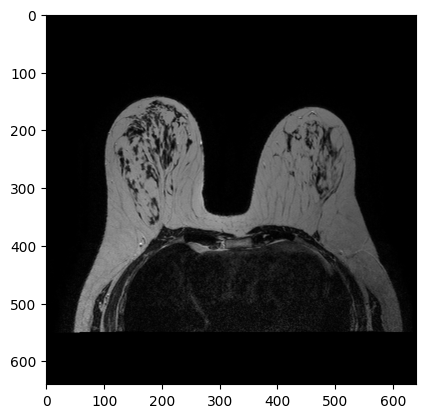

In [24]:
image_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0001/08-12-2008-NA-MRI Breast Bilateral with and without Contrast-44317/401.000000-T2WTSE SENSE-75663/1-40.dcm"
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

Lets convert the image to png/jpg:

In [12]:
image_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0001/08-12-2008-NA-MRI Breast Bilateral with and without Contrast-44317/401.000000-T2WTSE SENSE-75663/1-40.dcm"
ds = dicom.dcmread(image_path)

pixel_array_numpy = ds.pixel_array

image_format = ".jpg"
image_path = image_path.replace(".dcm", image_format)

cv2.imwrite(image_path, pixel_array_numpy)


True

## Load MRI BreastDX-01-0002

Let's preview MR dicom image without extracting any info:

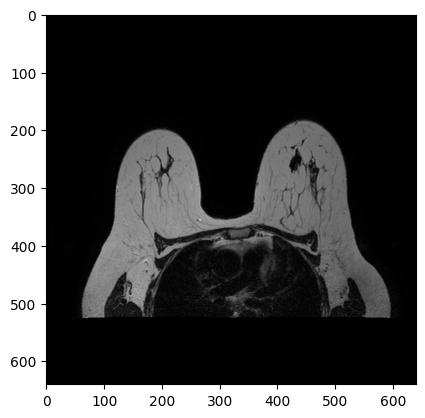

In [23]:
image_mri_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0002/11-25-2008-NA-MRI BREAST BILATERAL WITH T WITHOUT CONTRAST-58519/301.000000-T2WTSE SENSE-25645/1-60.dcm"

ds = dicom.dcmread(image_mri_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

In [15]:
image_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0002/11-25-2008-NA-MRI BREAST BILATERAL WITH T WITHOUT CONTRAST-58519/301.000000-T2WTSE SENSE-25645/1-60.dcm"
ds = dicom.dcmread(image_path)

pixel_array_numpy = ds.pixel_array

image_format = ".jpg"
image_path = image_path.replace(".dcm", image_format)

cv2.imwrite(image_path, pixel_array_numpy)

True

## Load STD PET Skull Thigh BreastDX-01-0002

Let's preview STD PET dicom image without extracting any info:

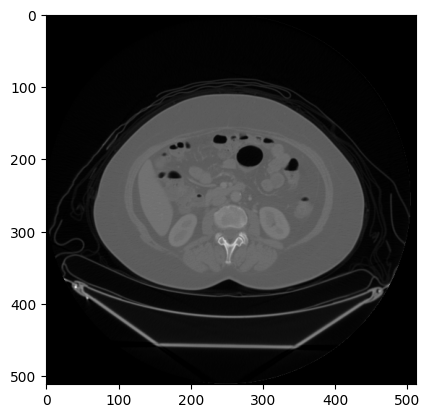

In [29]:
image_pet_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0002/11-29-2008-NA-PET SKULL-THIGH PLUS D-07347/3.000000-STD-78908/1-100.dcm"

ds = dicom.dcmread(image_pet_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

In [30]:
image_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0002/11-29-2008-NA-PET SKULL-THIGH PLUS D-07347/3.000000-STD-78908/1-100.dcm"
ds = dicom.dcmread(image_path)

pixel_array_numpy = ds.pixel_array

image_format = ".jpg"
image_path = image_path.replace(".dcm", image_format)

cv2.imwrite(image_path, pixel_array_numpy)

True

## Load WB 3D PET Skull Thigh BreastDX-01-0002

Let's preview WB 3D PET dicom image without extracting any info:

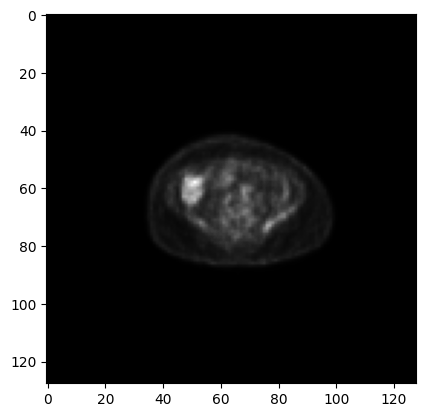

In [36]:
image_3d_pet_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0002/11-29-2008-NA-PET SKULL-THIGH PLUS D-07347/5.000000-WB 3D AC-61575/1-120.dcm"

ds = dicom.dcmread(image_3d_pet_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

## Load CAP PET Skull Thigh BreastDX-01-0002

Let's preview CAP PET dicom image without extracting any info:

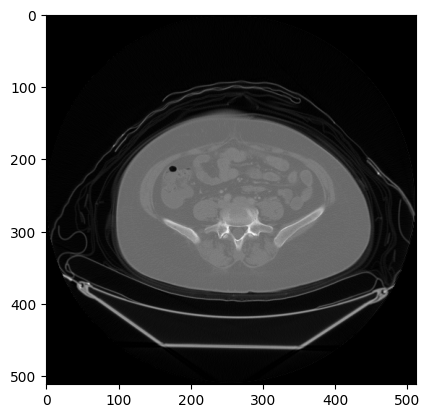

In [37]:
image_cap_pet_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0002/11-29-2008-NA-PET SKULL-THIGH PLUS D-07347/102.000000-CAP-59018/1-120.dcm"

ds = dicom.dcmread(image_cap_pet_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

## Load MG BreastDX-01-0003

Let's preview Diagnostic Mammogram **R CC** dicom image without extracting any info:

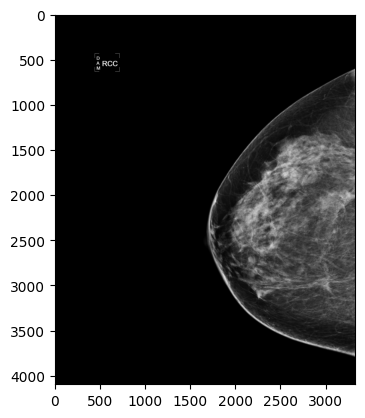

In [38]:
image_mg_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0003/04-12-2008-NA-Digital Diagnostic Mammogram Bilateral-75627/1.000000-R CC-22924/1-1.dcm"

ds = dicom.dcmread(image_mg_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

Let's preview Diagnostic Mammogram **R MLO** dicom image without extracting any info:

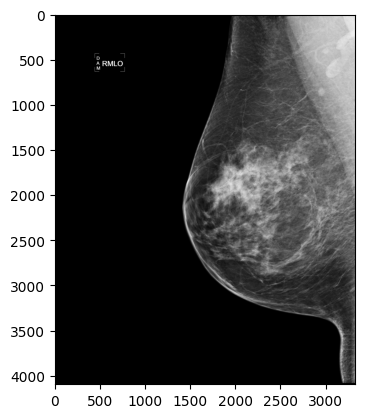

In [39]:
image_mg_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0003/04-12-2008-NA-Digital Diagnostic Mammogram Bilateral-75627/2.000000-R MLO-59292/1-1.dcm"

ds = dicom.dcmread(image_mg_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

Let's preview Diagnostic Mammogram **L CC** dicom image without extracting any info:

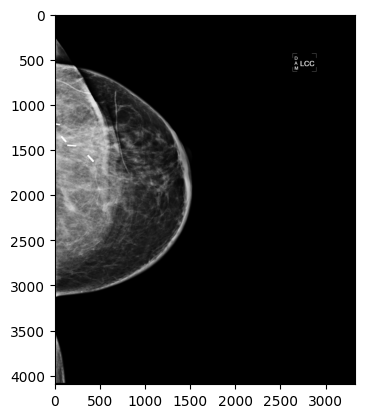

In [40]:
image_mg_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0003/04-12-2008-NA-Digital Diagnostic Mammogram Bilateral-75627/3.000000-L CC-82000/1-1.dcm"

ds = dicom.dcmread(image_mg_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

Let's preview Diagnostic Mammogram **L MLO** dicom image without extracting any info:

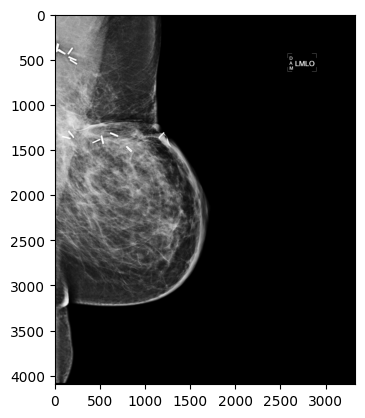

In [41]:
image_mg_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0003/04-12-2008-NA-Digital Diagnostic Mammogram Bilateral-75627/4.000000-L MLO-32218/1-1.dcm"

ds = dicom.dcmread(image_mg_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

Let's preview Diagnostic Mammogram **L XCCL** dicom image without extracting any info:

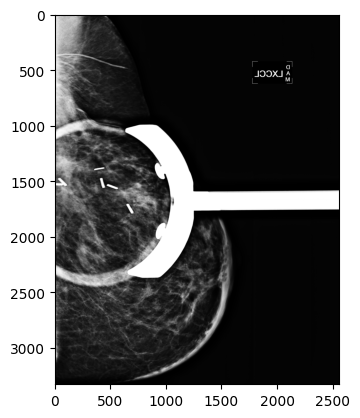

In [42]:
image_mg_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0003/04-12-2008-NA-Digital Diagnostic Mammogram Bilateral-75627/8.000000-L XCCL-16524/1-1.dcm"

ds = dicom.dcmread(image_mg_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

## Load PET CT Tumor Whole Body BreastDX-01-0005

Let's preview each Diagnostic **STD** PET CT Tumor Whole Body scan dicom image without extracting any info:

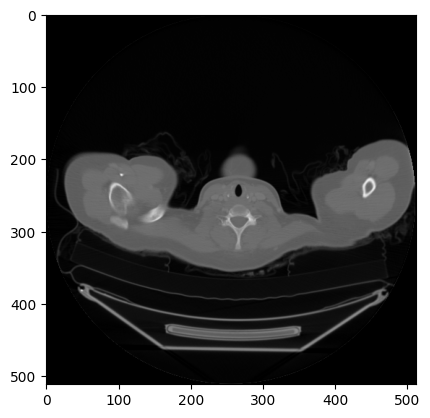

In [48]:
#1-001
image_petct_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0005/08-01-2008-NA-PET CT TUMOR WHOLE BO-50982/3.000000-STD-37432/1-001.dcm"

ds = dicom.dcmread(image_petct_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

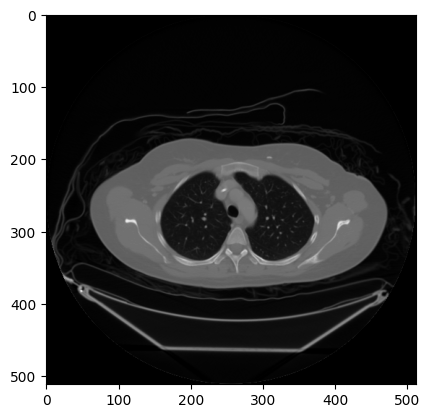

In [49]:
#1-025
image_petct_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0005/08-01-2008-NA-PET CT TUMOR WHOLE BO-50982/3.000000-STD-37432/1-025.dcm"

ds = dicom.dcmread(image_petct_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

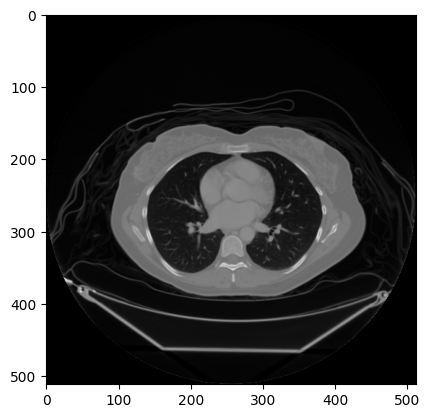

In [50]:
#1-050
image_petct_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0005/08-01-2008-NA-PET CT TUMOR WHOLE BO-50982/3.000000-STD-37432/1-050.dcm"

ds = dicom.dcmread(image_petct_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

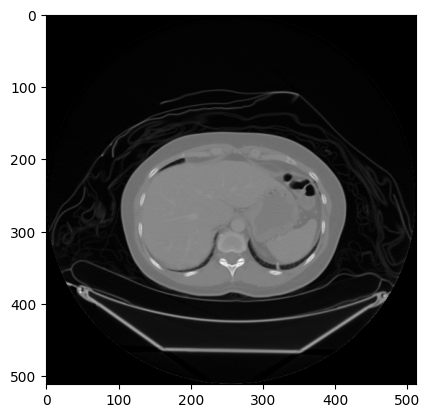

In [51]:
#1-075
image_petct_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0005/08-01-2008-NA-PET CT TUMOR WHOLE BO-50982/3.000000-STD-37432/1-075.dcm"

ds = dicom.dcmread(image_petct_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

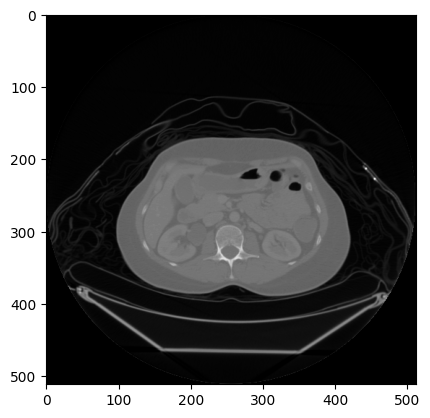

In [53]:
#1-100
image_petct_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0005/08-01-2008-NA-PET CT TUMOR WHOLE BO-50982/3.000000-STD-37432/1-100.dcm"

ds = dicom.dcmread(image_petct_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

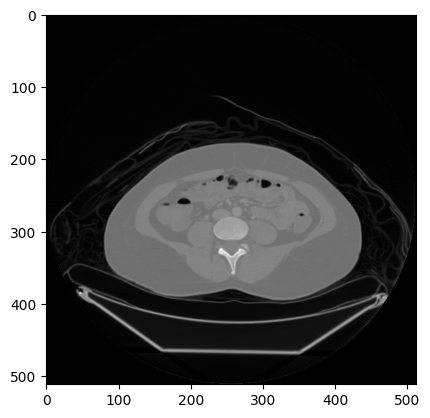

In [54]:
#1-125
image_petct_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0005/08-01-2008-NA-PET CT TUMOR WHOLE BO-50982/3.000000-STD-37432/1-125.dcm"

ds = dicom.dcmread(image_petct_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

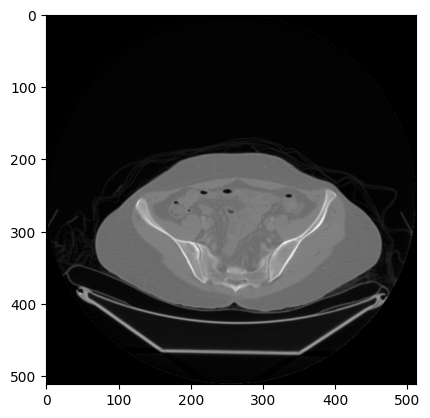

In [55]:
#1-150
image_petct_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0005/08-01-2008-NA-PET CT TUMOR WHOLE BO-50982/3.000000-STD-37432/1-150.dcm"

ds = dicom.dcmread(image_petct_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

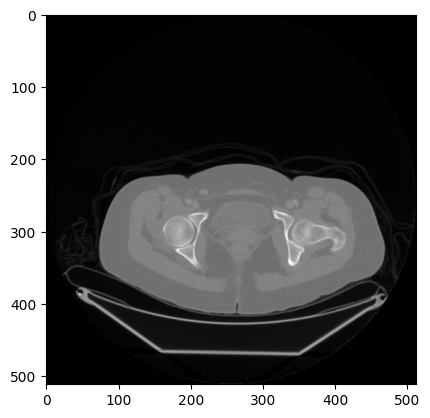

In [56]:
#1-175
image_petct_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0005/08-01-2008-NA-PET CT TUMOR WHOLE BO-50982/3.000000-STD-37432/1-175.dcm"

ds = dicom.dcmread(image_petct_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

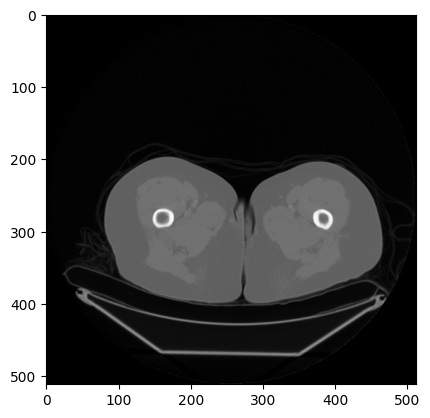

In [57]:
#1-200
image_petct_path = "/home/james/Downloads/Jetson_TX2_CMPE258/Breast_Cancer_MR_PT_CT_MG_Clinical_Img_Analyses_100Percent/manifest-BbshIhaG7188578559074019493/BREAST-DIAGNOSIS/BreastDx-01-0005/08-01-2008-NA-PET CT TUMOR WHOLE BO-50982/3.000000-STD-37432/1-200.dcm"

ds = dicom.dcmread(image_petct_path)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)